# Part II - (PISA DATA)
## by (Glendah Nyabuto)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
pisa = pd.read_csv('pisa.csv')

In [4]:
categories_list = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']  # The categories in the 'attitude_towards_school' columns
orderd = pd.api.types.CategoricalDtype(ordered=True, categories=categories_list)   # Orderinf then according to the way they are arrange in the categories_list
pisa['attitude_towards_school'] = pisa['attitude_towards_school'] .astype(orderd);

In [5]:
pisa['father_educated'] = pisa['father_educated'].astype('category')
pisa['mother_educated'] = pisa['mother_educated'].astype('category')

In [6]:
def uni_bar(df, values, title, xlab, ylab):
#Creating the figure size
    plt.figure(figsize=(10,6), dpi=100)
#Setting the color
    base_color = sb.color_palette()[0]
#Plotting using seabon
    ax = sb.countplot(data = df, x=values, color=base_color)
    for i in ax.patches:
        ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+ i.get_width()/2, i.get_height()+0.05), ha='center', va='bottom')

#Setting the title
    plt.title(title)
#Labeling the x and y axiz  
    plt.xlabel(xlab)
    plt.ylabel(ylab)

# Dsiplay the plot
    plt.show()


# 2.Histo

#Creating a function to help plot the distribution on math_plaues_value, reading_plause_values and science_plause_values
def hist_destribution(data, x, range, titles):
    bins = np.arange(0, range.max()+20, 20)      # Creating the bins for the histogram
    color=sb.color_palette()[1]       #Adding color
    sb.displot(data, x=x, height=7.0, aspect=2.0, bins=bins, kde = True, color=color);  #Ploting the displot
    plt.title(titles, fontdict={'fontsize': 20, 'fontweight': 'medium'})     # adding a tittle
    plt.xlabel(x.replace('_' ,' ').title(), fontdict={'fontsize': 16, 'fontweight': 'medium'}) # X label




# 3. Pie/Doughnut chat

#Creating a function to help plot the distribution on math_plaues_value, reading_plause_values and science_plause_values
def hist_destribution(data, x, range, titles):
    bins = np.arange(0, range.max()+20, 20)      # Creating the bins for the histogram
    color=sb.color_palette()[1]       #Adding color
    sb.displot(data, x=x, height=7.0, aspect=2.0, bins=bins, kde = True, color=color);  #Ploting the displot
    plt.title(titles, fontdict={'fontsize': 20, 'fontweight': 'medium'})     # adding a tittle
    plt.xlabel(x.replace('_' ,' ').title(), fontdict={'fontsize': 16, 'fontweight': 'medium'}) # X label


# 4. Bi_Scatter plot

def bi_scatter():
    plt.figure(figsize=(10,10))
    base_colr = sb.color_palette()[1]
    sb.regplot(x = pisa['min_reading_per_week'], y = pisa['average_perfomance'],color= base_colr, fit_reg=False);
    plt.title('Relationship between Minutes of Reading in a week and Average perfomance')
    plt.ylabel('Averahe Perfomance')
    plt.xlabel('Minutes of Reading in a week ')



# 5. Bi_Box plot

def box1(df, x, y, title):
    bs_colr = sb.color_palette()[0]
    sb.boxplot(data = df, x = x, y = y, color=bs_colr)
    plt.title(title)
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())
    plt.xticks(rotation = 30)


# 6. Violin plot

#Creating a function for a violin plot
def violin1(df, xvalue, yvalue, title):
    base_color = sb.color_palette()[0]
    sb.violinplot(data=df, x=xvalue, y=yvalue, color=base_color, inner='quartile')
    plt.title(title)
    plt.xlabel(xvalue.replace('_', ' ').title())
    plt.ylabel(yvalue.replace('_', ' ').title())



# 7. Points plot

#Creting a function for a points plot
def points(df, xvalue, yvalue, title, ylab):
    bs_cr = sb.color_palette()[0]
    sb.pointplot(data=df, x=xvalue, y=yvalue, ci='sd', linestyles="", color=bs_cr)
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xvalue.replace('_', ' ').title())


# 8. multi point plot

#Creating a function tco create a pont plot
def mult_points(df, xvalue, yvalue, hue, title, ylab):
    bs_cr = sb.color_palette()[1]
    sb.pointplot(data=df, x=xvalue, y=yvalue, ci='sd', linestyles="", hue=hue, dodge=0.4)  #ploting the polint plot
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xvalue.replace('_', ' ').title())
    plt.legend(title= 'Attitude towards school does not affect perfomance') # Adding a legend and its title

 
 # 9. Multi scatter

 #Creating a function a scatterplot
#creating a functio to plot a cluctered barchat 
def mult_clust():
    plt.figure(figsize=(16, 10))
    sb.barplot(data=pisa, x = 'gender', y= 'average_perfomance', hue='attitude_towards_school')
    plt.title('Average Perfomance by Gender and Attitude Toward School')
    plt.xlabel('Gender')
    plt.ylabel('Average Perfomance')
    plt.legend(title="Attitude Towards School", loc=(1, 1))  # creting a legend and placing it outside the plot
    plt.tight_layout()  # to fit both the legend and the graph in the layout/figure



# 10. Multi clusted bar chart

#Creating a function a scatterplot
def mult_scatter():
    x = sb.FacetGrid(data=pisa, hue='gender', height=10, aspect=1.5)
    x.map(plt.scatter, 'min_reading_per_week', 'average_perfomance')
    plt.title('Relationship between Minutes of reading per week and Average Perfomance per gender')
    x.set_xlabels('Minutes Reading per Week')
    x.set_ylabels('Average Perfomance')
    x.add_legend(title= 'Gender')







## Student perfomance internationally
> 262631 of the students are given an estimate international grade of 10. This is like 54% of the total students. Fewer students are graded 13, 12 and 7 respectively.

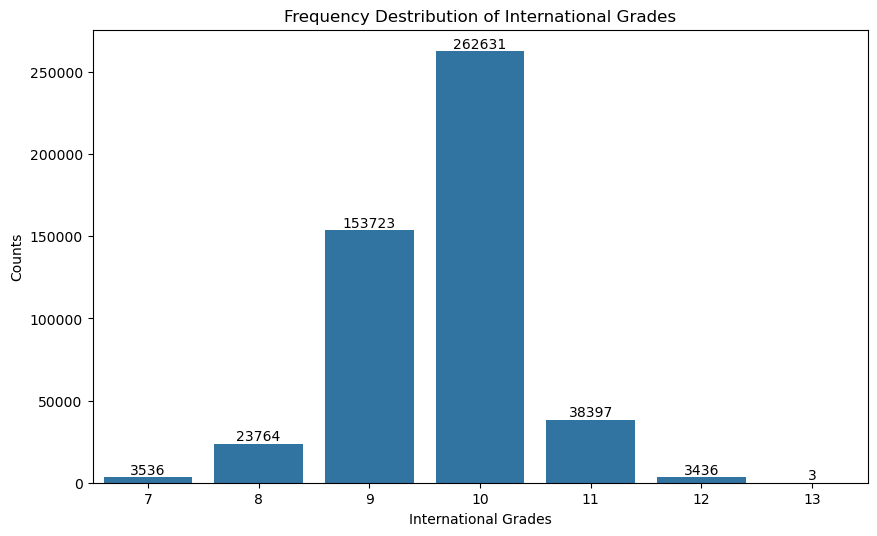

In [7]:
#Using uni_bar function to create a bar char that will illustrate the distribution of international grades
uni_bar(pisa,'international_grade', 'Frequency Destribution of International Grades', 'International Grades', 'Counts')


## Equalities experienced by Gender in terms of perfomance

Both gender are equal in terms perfomance, both have a mean of about 450

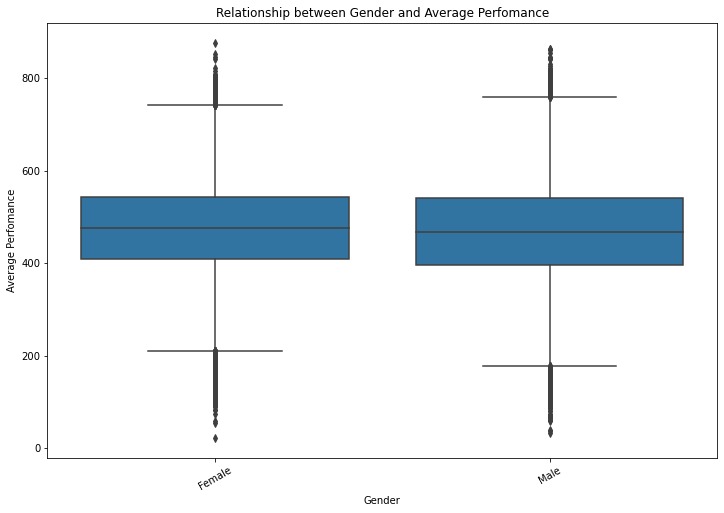

In [8]:
plt.figure(figsize=(12, 8))

box1(pisa, 'gender', 'average_perfomance', 'Relationship between Gender and Average Perfomance')

## Students with a parents perfom well 

> Students Who have a parent fairly perfom well. In both instances its clear that students who have either of the parent perfom better. But those who dont have a mother seem to perfom very poor than those who dont have a father

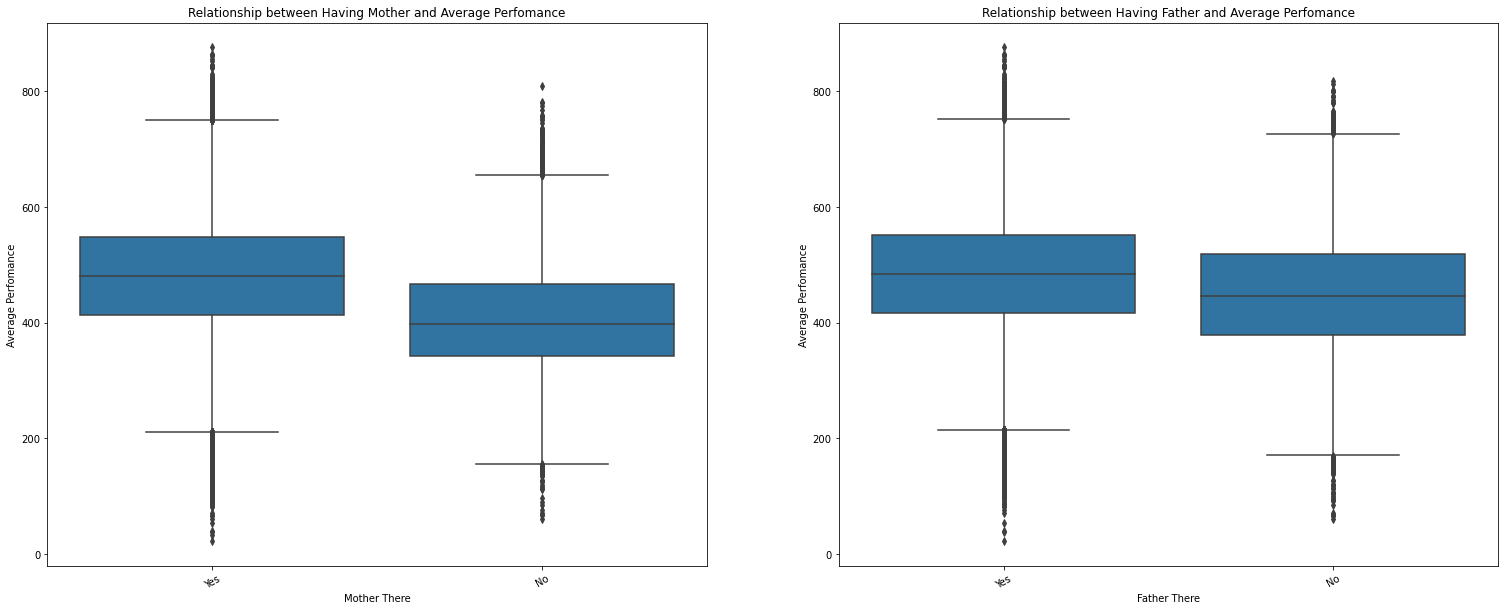

In [9]:
plt.figure(figsize=(26, 10))

plt.subplot(1, 2, 1)
ax1 = box1(pisa, 'mother_there', 'average_perfomance', 'Relationship between Having Mother and Average Perfomance')


plt.subplot(1, 2, 2)
box1(pisa, 'father_there', 'average_perfomance', 'Relationship between Having Father and Average Perfomance')



## Attitude toward school affect student perfomance

> A few `strongly agree and agree` that attitude towards achool does not affect student perfomance while a higher population `disagree and strongly disagree` that towards achool does not affect student perfomance 
> Parents and teacher shool employ techniques to help students have a postive attitude towards school. 

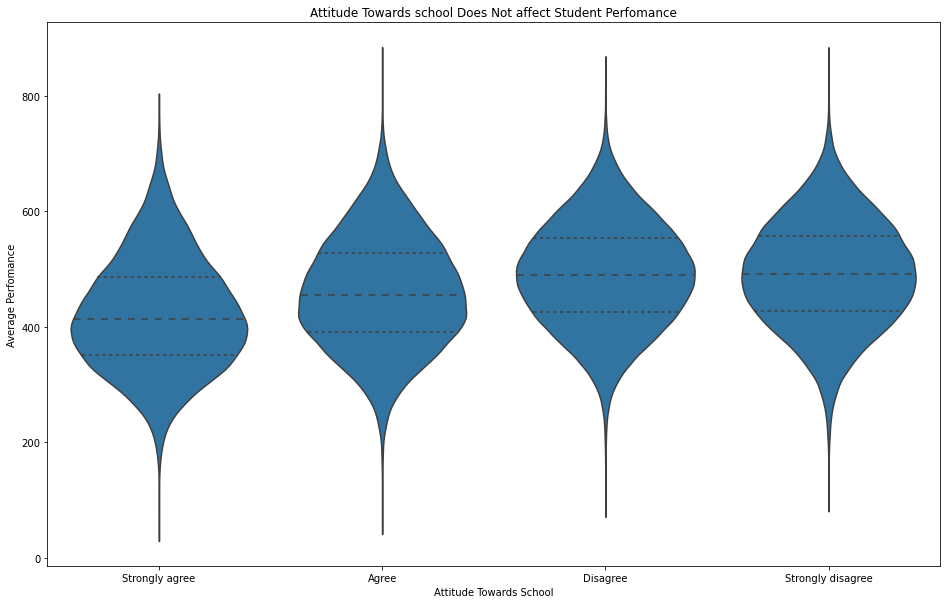

In [10]:
#Using the violin function to plot a visualization for attitude towards school and average perfomance
plt.figure(figsize=(16,10))


violin1(pisa,  'attitude_towards_school', 'average_perfomance', 'Attitude Towards school Does Not affect Student Perfomance')

## Inequality in terms of students access to ICT tools and digital devices
> There is a huge inequality in ICT  integration in school. `317,214` student that is about `65%` 0f the population don't have access to ICT in there schools. `0.44%` enjoy the service of ICT integration while about `34%` compete for ICt resouces in schools

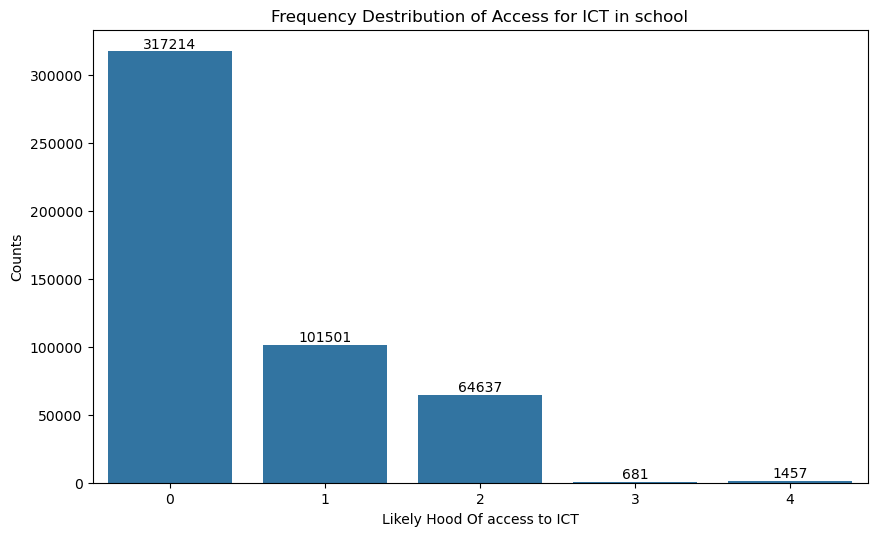

In [11]:
#Using uni_bar function to create a bar char that will illustrate the distribution of international grades
uni_bar(pisa,'ict_in_school', 'Frequency Destribution of Access for ICT in school', 'Likely Hood Of access to ICT', 'Counts')

## There is an increace in perfomance with an increase in access of digital devices and also this infuences postively the attitude towards school

> Availabilty of digital devices at home is seen to have an influece o students' overal perfomance, As shown in the first graph above at the number of devices increase there is an increase in average perfomance of the students



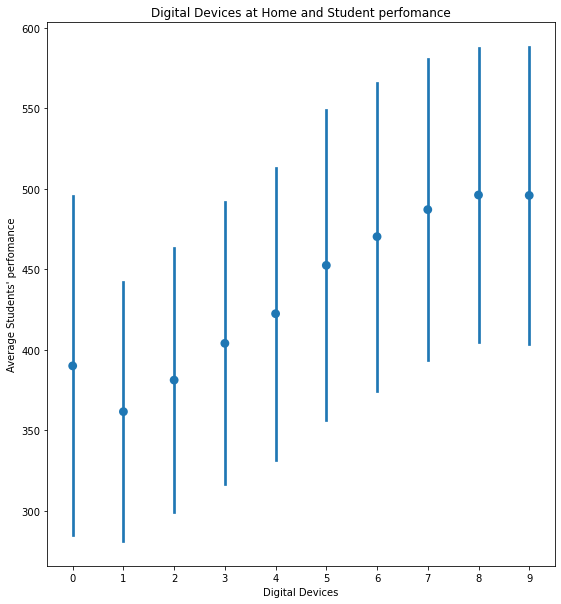

In [12]:
#Using the function above to create point plots digital devices at home with average perfomance and 
#ICT tools in school with average student perfomance
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
points(pisa, 'digital_devices', 'average_perfomance', 'Digital Devices at Home and Student perfomance', "Average Students' perfomance")


## Attitude toward school affect student pwerfomance by

> For both male and female, those student who perfome well `disagree and strongly disagree` that attitude towards school does not contribute to student perfomance where as the ones who perform poorly `agree and strongly agree` that that attitude towards school does not contribute to student perfomance

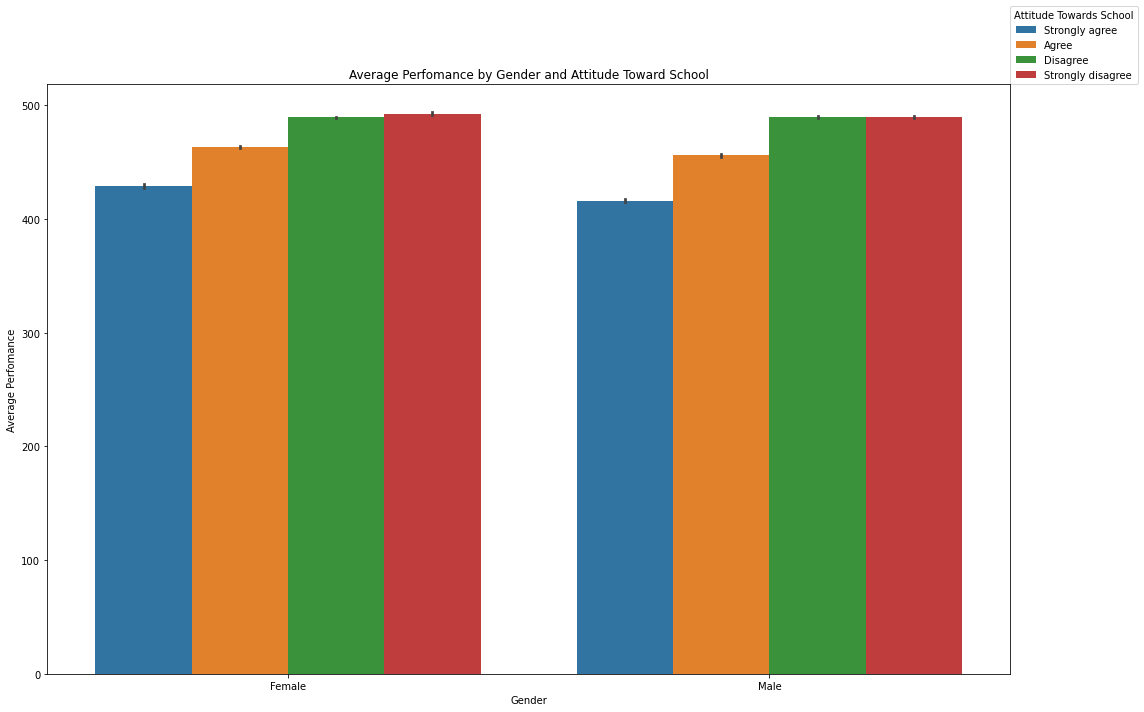

In [13]:
mult_clust()

## Parent level of education affect student perfomance
> Student's average perfomance increase with the increase in level of education of parents. From the above graphs its seen that those students whose mothers and Fathers reached `Level 3A and 3` perfom better that who reached `Level 2, Level 1` and also students whose parents `Did not complete level 1` at all perfom poorly

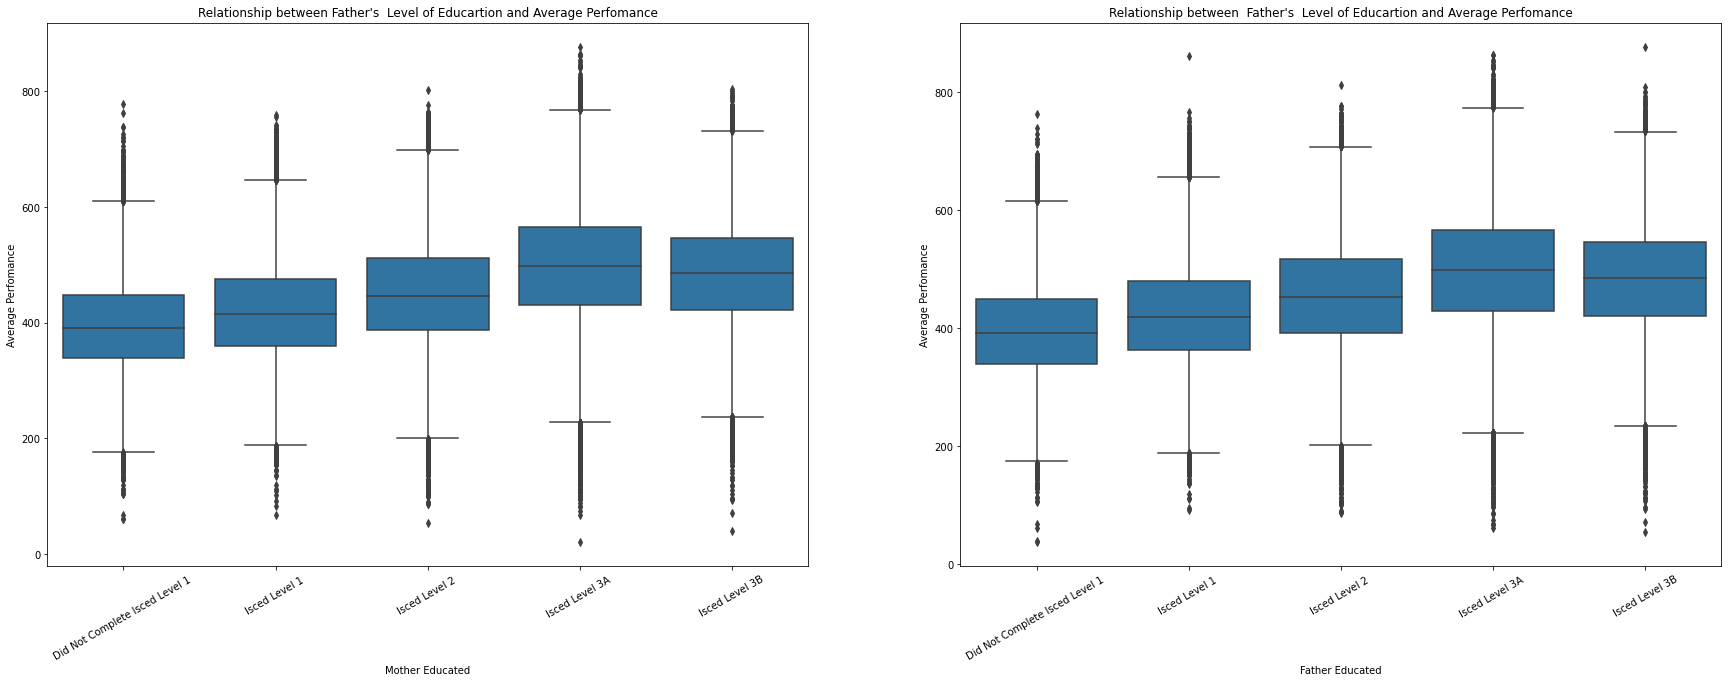

In [14]:
#Using the function for box plot to create subplots of boxpots to represent parents eucation and student perfomance
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
ax1 = box1(pisa, 'mother_educated', 'average_perfomance', "Relationship between Father's  Level of Educartion and Average Perfomance")


plt.subplot(1, 2, 2)
box1(pisa, 'father_educated', 'average_perfomance', "Relationship between  Father's  Level of Educartion and Average Perfomance")




## Teacher classroom managemnet does not impact student perfomance
> There is no signifiant relationship between Teacher classroom management and student average perfomance

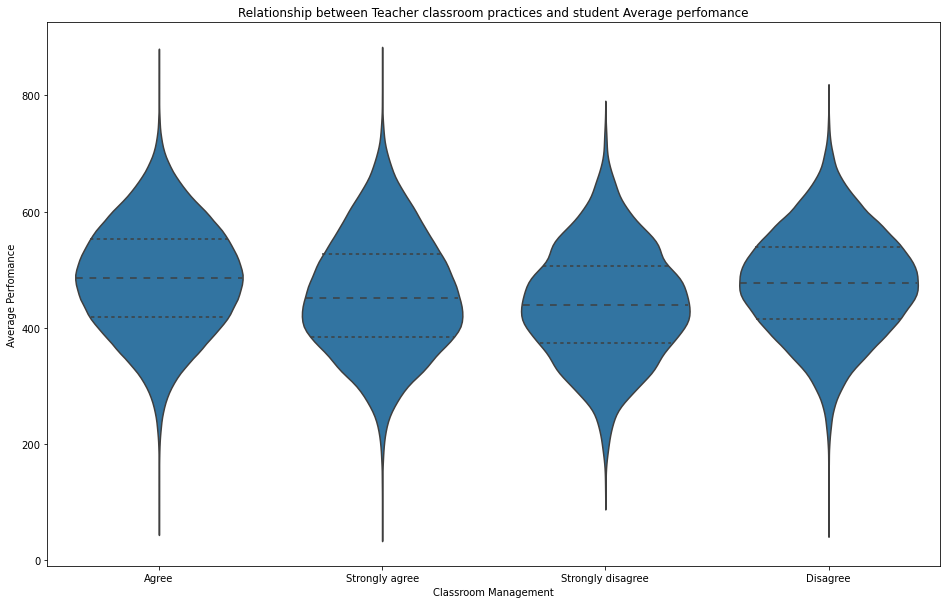

In [15]:
#Using the violin function to plot a visualization for Teacher class room practices and average perfomance

plt.figure(figsize=(16,10))

violin1(pisa, 'classroom_management', 'average_perfomance', 'Relationship between Teacher classroom practices and student Average perfomance')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [15]:
# Use this command if you are running this file in local
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
